In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import mahotas as mt
import gc 
import cv2

In [2]:
#np.load implementation
y_train = np.load('y_train.npy')
X_train = np.load('X_train.npy', mmap_mode='r')

In [3]:
#pytorch load implementation
from torch.utils.data import DataLoader

train_data = []
test_data = []
i = 0 

## First 600 rows are our "train data"
while i < 600:
    train_data.append([np.array(X_train[i]),y_train[i]])
    i += 1
    
## Rest are "test data"
while i < len(X_train):
    test_data.append([np.array(X_train[i]),y_train[i]])
    i = i + 1
    
train_dataloader = DataLoader( train_data, batch_size = 20)
test_dataloader = DataLoader( test_data, batch_size = 20)

In [23]:
len(train_dataloader)

30

In [4]:
del train_data
del test_data
gc.collect()

15

Feature batch shape: torch.Size([20, 1024, 1024, 3])
Labels batch shape: torch.Size([20])


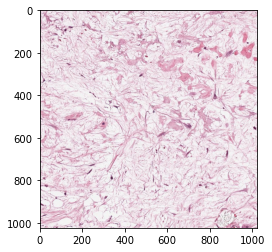

Label: 2.0


In [22]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f"Label: {label}")

In [15]:
def extract_features(image):
    # calculate haralick texture features for 4 types of adjacency
    textures = mt.features.haralick(image)

    # take the mean of it and return it
    ht_mean = textures.mean(axis=0)
    return ht_mean

In [39]:
simplified_training_data = []
i = 0 
for batch_features, batch_label in iter(train_dataloader):
    for batch_feature in batch_features:
        gray =  np.dot(batch_feature[...,:3], [76.24499999999999, 149.685, 29.07]) #combines unormalisation and 
        haralick_feature = extract_features(gray.astype(int))
        simplified_training_data.append(haralick_feature)
        print(str(int(100*i/600)) + "% done.")
        i = i + 1 

0% done.
0% done.
0% done.
0% done.
0% done.
0% done.
1% done.
1% done.
1% done.
1% done.
1% done.
1% done.
2% done.
2% done.
2% done.
2% done.
2% done.
2% done.
3% done.
3% done.
3% done.
3% done.
3% done.
3% done.
4% done.
4% done.
4% done.
4% done.
4% done.
4% done.
5% done.
5% done.
5% done.
5% done.
5% done.
5% done.
6% done.
6% done.
6% done.
6% done.
6% done.
6% done.
7% done.
7% done.
7% done.
7% done.
7% done.
7% done.
8% done.
8% done.
8% done.
8% done.
8% done.
8% done.
9% done.
9% done.
9% done.
9% done.
9% done.
9% done.
10% done.
10% done.
10% done.
10% done.
10% done.
10% done.
11% done.
11% done.
11% done.
11% done.
11% done.
11% done.
12% done.
12% done.
12% done.
12% done.
12% done.
12% done.
13% done.
13% done.
13% done.
13% done.
13% done.
13% done.
14% done.
14% done.
14% done.
14% done.
14% done.
14% done.
15% done.
15% done.
15% done.
15% done.
15% done.
15% done.
16% done.
16% done.
16% done.
16% done.
16% done.
16% done.
17% done.
17% done.
17% done.
17% done.


In [40]:
i = 0
simplified_test_data = []
for batch_features, batch_label in iter(test_dataloader):
    for batch_feature in batch_features:
        gray =  np.dot(batch_feature[...,:3], [76.24499999999999, 149.685, 29.07]) #combines unormalisation and 
        haralick_feature = extract_features(gray.astype(int))
        simplified_test_data.append(haralick_feature)
        print(str(int(100*i/257)) + "% done.")
        i += 1

0% done.
0% done.
0% done.
1% done.
1% done.
1% done.
2% done.
2% done.
3% done.
3% done.
3% done.
4% done.
4% done.
5% done.
5% done.
5% done.
6% done.
6% done.
7% done.
7% done.
7% done.
8% done.
8% done.
8% done.
9% done.
9% done.
10% done.
10% done.
10% done.
11% done.
11% done.
12% done.
12% done.
12% done.
13% done.
13% done.
14% done.
14% done.
14% done.
15% done.
15% done.
15% done.
16% done.
16% done.
17% done.
17% done.
17% done.
18% done.
18% done.
19% done.
19% done.
19% done.
20% done.
20% done.
21% done.
21% done.
21% done.
22% done.
22% done.
22% done.
23% done.
23% done.
24% done.
24% done.
24% done.
25% done.
25% done.
26% done.
26% done.
26% done.
27% done.
27% done.
28% done.
28% done.
28% done.
29% done.
29% done.
29% done.
30% done.
30% done.
31% done.
31% done.
31% done.
32% done.
32% done.
33% done.
33% done.
33% done.
34% done.
34% done.
35% done.
35% done.
35% done.
36% done.
36% done.
36% done.
37% done.
37% done.
38% done.
38% done.
38% done.
39% done.
39% do

# Simple logistic regression

In [24]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [26]:
lm = linear_model.LogisticRegression(max_iter = 10000)
lm.fit(simplified_training_data, y_train[0:600])

LogisticRegression(max_iter=10000)

In [28]:
lm.score(simplified_training_data, y_train[0:600])

0.7383333333333333

In [41]:
lm.score(simplified_test_data, y_train[600:])

0.7209302325581395